### Exercitiul 1
> Fie 3 variabile aleatoare: $C$ (usa pe care o va alege jucatorul), $P$(usa dupa care se afla premiul), $H$(usa pe care o va alege host-ul). Toate aceste variabile pot prelua valori din multimea $\{1, 2, 3\}$, adica usa 1, usa 2, usa 3.
>
> Graful aciclic directionat arata ca H, usa aleasa de host, depinde de usa care a fost aleasa inainte pentru a ascunde premiul(P), cat si de usa aleasa initial de catre player(C).

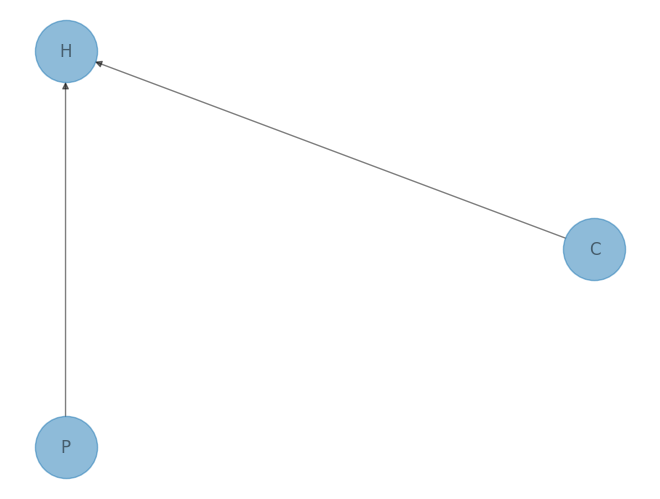

In [98]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

# Definim structura
model = BayesianNetwork([("C", "H"), ("P", "H")])
pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [99]:
# 
cpd_c = TabularCPD("C", 3, [[1/3], [1/3], [1/3]])
cpd_p = TabularCPD("P", 3, [[1/3], [1/3], [1/3]])
cpd_h = TabularCPD(
    "H",
    3,
    [
        [0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
        [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
        [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0],
    ],
    evidence=["C", "P"],
    evidence_card=[3, 3],
)

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()
model.check_model()

True

In [100]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["P"], evidence={"C": 0, "H": 2})
print(posterior_p)

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


### Exercitiul 2

### 1)

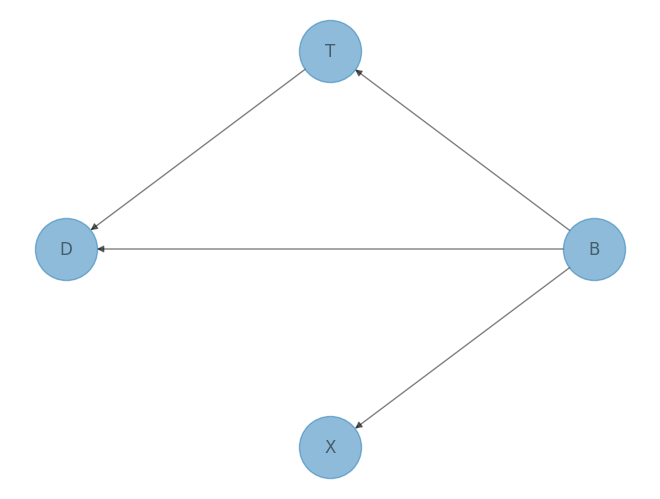

In [101]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

# definirea retelei Bayesiene
lung_disease_model = BayesianNetwork([('B', 'T'), ('B', 'D'), ('B', 'X'), ('T','D')])

# vizualizarea retelei bayesiene
pos = nx.circular_layout(lung_disease_model)
nx.draw(lung_disease_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [102]:
# Definirea variabilei radacina B
CPD_B = TabularCPD(variable='B', variable_card=2, values=[[0.9], [0.1]])
print(CPD_B)

# Definirea variabilelor cu un singur parinte(T si X)
CPD_T = TabularCPD(variable='T', variable_card=2, 
                   values=[[0.7, 0.2],  # 1 - P(T = 1 | B = 1), 1 - P(T = 1 | B = 0)
                           [0.3, 0.8]], # P(T = 1 | B = 0), P(T = 1 | B = 1)
                   evidence=['B'],
                   evidence_card=[2])
print(CPD_T)

CPD_X = TabularCPD(variable='X', variable_card=2,
                   values=[[0.9, 0.1], 
                           [0.1,0.9]],
                   evidence=['B'],
                   evidence_card=[2])
print(CPD_X)

# Definirea variabilei cu 2 parinti(B)
CPD_D = TabularCPD(variable='D', variable_card=2,
                   values=[[0.9, 0.5, 0.6, 0.1], 
                           [0.1, 0.5, 0.4, 0.9]],
                   evidence=['B', 'T'],
                   evidence_card=[2, 2])
print(CPD_D)

# Adaugarea distributiilor conditionale la model:
lung_disease_model.add_cpds(CPD_B, CPD_T, CPD_X, CPD_D)
lung_disease_model.get_cpds()

# Verificarea modelului:
lung_disease_model.check_model()

# Verificarea independentelor:
lung_disease_model.local_independencies(['B', 'T', 'X', 'D'])

+------+-----+
| B(0) | 0.9 |
+------+-----+
| B(1) | 0.1 |
+------+-----+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| T(0) | 0.7  | 0.2  |
+------+------+------+
| T(1) | 0.3  | 0.8  |
+------+------+------+
+------+------+------+
| B    | B(0) | B(1) |
+------+------+------+
| X(0) | 0.9  | 0.1  |
+------+------+------+
| X(1) | 0.1  | 0.9  |
+------+------+------+
+------+------+------+------+------+
| B    | B(0) | B(0) | B(1) | B(1) |
+------+------+------+------+------+
| T    | T(0) | T(1) | T(0) | T(1) |
+------+------+------+------+------+
| D(0) | 0.9  | 0.5  | 0.6  | 0.1  |
+------+------+------+------+------+
| D(1) | 0.1  | 0.5  | 0.4  | 0.9  |
+------+------+------+------+------+


(T ⟂ X | B)
(X ⟂ T, D | B)
(D ⟂ X | B, T)

### 2) Calculam probabilitatea urmatoare:
> $P(B = 1|T = 1, D = 1)$

In [103]:
from pgmpy.inference import VariableElimination

# Crearea unui obiect de inferenta
inference = VariableElimination(lung_disease_model)

# Calcularea probabilitatii P(B = 1|T = 1, D = 1)
prob_B_given_TD = inference.query(variables=['B'], evidence={'T': 1, 'D': 1})

print("Probabilitatea ca pacientul sa aiba boala pulmonara stiind ca are tuse si dificultati de respiratie este:", prob_B_given_TD.values[1])

Probabilitatea ca pacientul sa aiba boala pulmonara stiind ca are tuse si dificultati de respiratie este: 0.34782608695652184


### 3) Calculam probabilitatea:
> $P(X = 1 | B = 0)$

In [104]:
# Calcularea probabilitatii P(X = 1 | B = 0)
prob_X_given_B0 = inference.query(variables=['X'], evidence={'B': 0})

print("Probabilitatea ca radiografie sa fie anormala stiind ca pacientul nu are boala pulmonara este:", prob_X_given_B0.values[1])


Probabilitatea ca radiografie sa fie anormala stiind ca pacientul nu are boala pulmonara este: 0.1


# Exercitiul 3

### 1) Simularea jocului dintre cei 2

In [105]:
import numpy as np

# Functia returneaza 0, daca castigatorul jocului este J0 si 1 daca J1 este castigatorul
def game_winner():
    # simularea aruncarii monedei
    first_player = np.random.choice(["J0", "J1"])
    if first_player == "J0": # primul jucator este J0
        n = np.random.randint(1, 6)

        # Al doilea jucator, J1, arunca o moneda masluita de 2n ori
        m = np.random.binomial(2 * n, 4/7)

        if n >= m:
            return 0
        
    else: # primul jucator este J1
        n = np.random.randint(1, 6)

        # Randul celui de-al doilea jucator, J0, care arunca o moneda normala de 2n ori
        m = np.random.binomial(2 * n, 1/2)
        
        if n >= m:
            return 1
        
# simularea a 10000 de jocuri
j0_num_castiguri = 0
j1_num_castiguri = 0
for i in range(10000):
    if game_winner() == 0:
        j0_num_castiguri += 1
    else:
        j1_num_castiguri += 1

if j0_num_castiguri > j1_num_castiguri:
    print("Jucatorul J0 are sanse mai mari de castig decat J1")
else:
    print("Jucatorul J1 are sanse mai mari de castig decat J0")



Jucatorul J1 are sanse mai mari de castig decat J0


### 2)Setam Variabila S ca fiind jucatorul care incepe jocul, variabila N este valoarea zarului obtinuta in prima runda a jocului, M este numarul de steme obtinute in a doua runda a jocului.

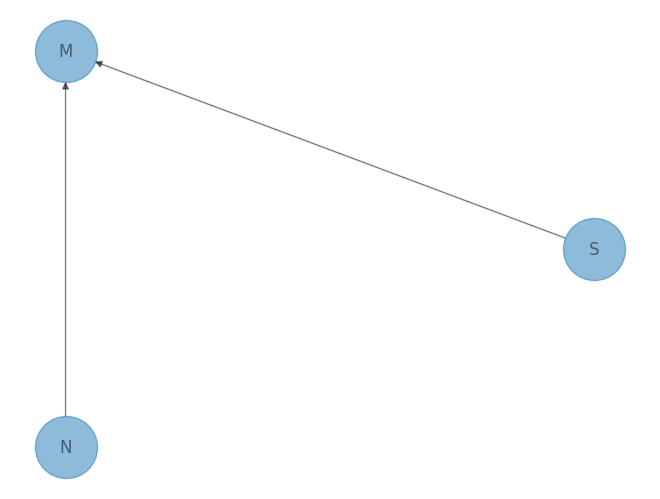

In [106]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

# definirea retelei Bayesiene
game_model = BayesianNetwork([('S', 'M'), ('N', 'M')])

# vizualizarea retelei bayesiene
pos = nx.circular_layout(game_model)
nx.draw(game_model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [107]:
# Definirea variabilelor radacine S so N
CPD_S = TabularCPD(variable='S', variable_card=2,
                    values=[[0.5], [0.5]] # P(S = J0), P(S = J1)
                    )
print(CPD_S)

CPD_N = TabularCPD(variable='N', variable_card=6,
                    values=[[1/6], 
                            [1/6],
                            [1/6],
                            [1/6],
                            [1/6],
                            [1/6]
                            ] 
                    )
print(CPD_N)

"""
# Definirea variabilei cu un singur parinte(M)
CPD_M = TabularCPD(variable='M', variable_card=6, 
                   values=[[0.7, 0.2],  
                           [0.3, 0.8]], 
                   evidence=['S'],
                   evidence_card=[2])
print(CPD_M)
"""

+------+-----+
| S(0) | 0.5 |
+------+-----+
| S(1) | 0.5 |
+------+-----+
+------+----------+
| N(0) | 0.166667 |
+------+----------+
| N(1) | 0.166667 |
+------+----------+
| N(2) | 0.166667 |
+------+----------+
| N(3) | 0.166667 |
+------+----------+
| N(4) | 0.166667 |
+------+----------+
| N(5) | 0.166667 |
+------+----------+


"\n# Definirea variabilei cu un singur parinte(M)\nCPD_M = TabularCPD(variable='M', variable_card=6, \n                   values=[[0.7, 0.2],  \n                           [0.3, 0.8]], \n                   evidence=['S'],\n                   evidence_card=[2])\nprint(CPD_M)\n"